In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Raw Data preprocessing Step
Combine data from year 2018 to 2021 into one dataset, look into dtype and missing values of each column,
removing columns that provide zero inforamtion and re-organize rest columns


In [7]:
#read the NFL data (from 2018 - 2021)

data2021 = pd.read_csv("/home/wenrui/Downloads/pbp-2021.csv")
data2020 = pd.read_csv("/home/wenrui/Downloads/pbp-2020.csv")
data2019 = pd.read_csv("/home/wenrui/Downloads/pbp-2019.csv")
data2018 = pd.read_csv("/home/wenrui/Downloads/pbp-2018.csv")



#check the shape of the data
print(data2021.shape)
print(data2020.shape)
print(data2019.shape)
print(data2018.shape)

(42795, 45)
(46189, 45)
(42186, 45)
(45016, 45)


In [8]:
#check if any columns are different among data
print(sum(data2021.columns != data2020.columns))
print(sum(data2020.columns != data2019.columns))
print(sum(data2019.columns != data2018.columns))
print("All columns are matching!")

0
0
0
All columns are matching!


In [11]:
#concat all four subsets by columns

nfl_data = pd.concat([data2021, data2020, data2019, data2018], axis=0)

print(f"The combined data shape is {nfl_data.shape}")

nfl_data.head().T

The combined data shape is (176186, 45)


,0,1,2,3,4
GameId,2021092612,2021092612,2021092612,2021092612,2021101008
GameDate,2021-09-26,2021-09-26,2021-09-26,2021-09-26,2021-10-10
Quarter,1,1,1,1,1
Minute,9,8,7,7,9
Second,10,32,52,13,50
OffenseTeam,MIN,MIN,MIN,MIN,WAS
DefenseTeam,SEA,SEA,SEA,SEA,NO
Down,1,1,2,1,2
ToGo,10,10,2,8,2
YardLine,57,74,82,92,51


In [12]:
#Call the info method on NFL data to check the summary of the data
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176186 entries, 0 to 45015
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   GameId                          176186 non-null  int64  
 1   GameDate                        176186 non-null  object 
 2   Quarter                         176186 non-null  int64  
 3   Minute                          176186 non-null  int64  
 4   Second                          176186 non-null  int64  
 5   OffenseTeam                     161997 non-null  object 
 6   DefenseTeam                     168543 non-null  object 
 7   Down                            176186 non-null  int64  
 8   ToGo                            176186 non-null  int64  
 9   YardLine                        176186 non-null  int64  
 10  Unnamed: 10                     0 non-null       float64
 11  SeriesFirstDown                 176186 non-null  int64  
 12  Unnamed: 12      

In [13]:
#select object features and numeric features
object_features = nfl_data.select_dtypes(include='object').columns
numeric_features = nfl_data.select_dtypes(exclude='object').columns


In [14]:
#Check of number of missing data per column for object and numeric features


missing = pd.concat([nfl_data.isnull().sum(), 100 * nfl_data.isnull().mean()], axis=1)
missing.columns=['count',  '%missing']
pd.set_option('display.max_rows', missing.shape[0]+1)
sorted_missing = missing.sort_values(by='count', ascending=False)


print(f"Missing data in object features:\n{sorted_missing.loc[list(object_features)].sort_values('%missing')}")

print(f"Missing data in numeric features:\n{sorted_missing.loc[list(numeric_features)].sort_values('%missing')}")

Missing data in object features:
                    count   %missing
GameDate                0   0.000000
Description             0   0.000000
YardLineDirection       0   0.000000
Formation            3502   1.987672
PlayType             7098   4.028697
DefenseTeam          7643   4.338029
OffenseTeam         14189   8.053421
PassType           103823  58.928065
RushDirection      128460  72.911582
PenaltyType        162023  91.961336
PenaltyTeam        162025  91.962471
Missing data in numeric features:
                                 count  %missing
GameId                               0       0.0
IsPenaltyAccepted                    0       0.0
YardLineFixed                        0       0.0
IsTwoPointConversionSuccessful       0       0.0
IsTwoPointConversion                 0       0.0
IsPenalty                            0       0.0
IsFumble                             0       0.0
IsInterception                       0       0.0
IsMeasurement                        0       0.0

In [15]:
'''
Removing all unnamed columns (just separation line in the csv table)
Remove Challenger and penalties from the raw dataset

'''

filtered_data = nfl_data.drop(['Challenger', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 10'\
                              ,'PenaltyType', 'PenaltyTeam'], axis=1)




In [16]:
'''
Explore the reasons of missing values in Formation and PlayType
'''

#Most missing Formation are not related with game play itself

print(f"Missing Formation are not related with game play itself:\n\
{filtered_data[filtered_data.Formation.isnull()].value_counts('Description')}")




Missing Formation are not related with game play itself:
Description
END QUARTER 1                                                                               987
END QUARTER 3                                                                               986
END QUARTER 2                                                                               981
GAME                                                                                        496
END QUARTER 4                                                                                50
END QUARTER 2 5TH CONSECUTIVE 1ST-HALF SHUTOUT (INCLUDING PLAYOFFS)                           1
END QUARTER 4 TENN CALLED TAILS. COIN TOSS WAS HEADS. BAL WINS TOSS AND WILL RECEIVE KO.      1
dtype: int64


In [17]:
'''
Explore the reasons of missing values in PlayType
'''

##Missing PlayType are not related with game play itself

print(f"Missing PlayType are not related with game play itself:\n\
{filtered_data[filtered_data.PlayType.isnull()].value_counts('Description')}")

Missing PlayType are not related with game play itself:
Description
TWO-MINUTE WARNING                                                                                                      1973
END QUARTER 1                                                                                                            987
END QUARTER 3                                                                                                            986
END QUARTER 2                                                                                                            981
END GAME                                                                                                                 980
                                                                                                                        ... 
(:08) (SHOTGUN) DIRECT SNAP TO 30-D.JOHNSON.  30-D.JOHNSON LEFT END TO PIT 39 FOR 1 YARD (97-C.HEYWARD).                   1
(:06) (SHOTGUN) DIRECT SNAP TO 41-A.KAMARA.  41-A.KAMARA 

In [18]:
'''
Explore the reasons of missing values in DefenseTeam
'''

##Missing DefenseTeamare not related with game play itself

print(f"Missing PlayType are not related with game play itself:\n\
{filtered_data[filtered_data.DefenseTeam.isnull()].value_counts('Description')}")

Missing PlayType are not related with game play itself:
Description
TWO-MINUTE WARNING             1005
GAME                            496
END QUARTER 1                   496
END GAME                        496
END QUARTER 3                   496
                               ... 
TIMEOUT #1 BY PHI AT 07:25.       1
TIMEOUT #1 BY PHI AT 07:45.       1
TIMEOUT #1 BY PHI AT 07:47.       1
TIMEOUT #1 BY PHI AT 07:49.       1
TIMEOUT #2 BY DAL AT 00:24.       1
Length: 3805, dtype: int64


In [19]:
'''
Explore the reasons of missing values in OffenseTeam
'''

##Missing DefenseTeamare not related with game play itself

print(f"Missing PlayType are not related with game play itself:\n\
{filtered_data[filtered_data.OffenseTeam.isnull()].value_counts('Description')}")

Missing PlayType are not related with game play itself:
Description
TWO-MINUTE WARNING             1973
END QUARTER 1                   987
END QUARTER 3                   986
END QUARTER 2                   981
END GAME                        980
                               ... 
TIMEOUT #1 BY OAK AT 08:32.       1
TIMEOUT #1 BY OAK AT 08:17.       1
TIMEOUT #1 BY OAK AT 08:16.       1
TIMEOUT #1 BY OAK AT 08:11.       1
TIMEOUT #2 BY CHI AT 05:52.       1
Length: 6772, dtype: int64


In [20]:
#remove data where Offense or Defense are NaN, as they are not plays
filtered_data = filtered_data.dropna(axis=0, how='any', subset=['OffenseTeam', 'DefenseTeam'])

In [21]:
#removing all irrelavent rows from fitlered data

filtered_data_v2 = filtered_data[~filtered_data[['Formation', 'PlayType', 'OffenseTeam', 'DefenseTeam']].isna().any(axis=1)]
filtered_data_v2.isna().sum().T

GameId                                 0
GameDate                               0
Quarter                                0
Minute                                 0
Second                                 0
OffenseTeam                            0
DefenseTeam                            0
Down                                   0
ToGo                                   0
YardLine                               0
SeriesFirstDown                        0
NextScore                              0
Description                            0
TeamWin                                0
SeasonYear                             0
Yards                                  0
Formation                              0
PlayType                               0
IsRush                                 0
IsPass                                 0
IsIncomplete                           0
IsTouchdown                            0
PassType                           89455
IsSack                                 0
IsChallenge     

In [22]:
'''
Checking the missing values for PassType and RushDirection
'''
#Remove entries where both PassType and RushDirection are null as they are TouchBacks

print("Remove entries where both PassType and RushDirection are null as they are TouchBacks\n")

print(filtered_data_v2[np.logical_and(filtered_data_v2.RushDirection.isnull(), filtered_data_v2.PassType.isnull())]\
.value_counts('Description'))





filtered_data_v3 = filtered_data_v2[~np.logical_and(filtered_data_v2.RushDirection.isnull(), filtered_data_v2.PassType.isnull())]


print(f"\n\nThe final data shape is {filtered_data_v3.shape}")

Remove entries where both PassType and RushDirection are null as they are TouchBacks

Description
7-H.BUTKER KICKS 65 YARDS FROM KC 35 TO END ZONE, TOUCHBACK.                                                                                                                                                                                                                250
8-B.PINION KICKS 65 YARDS FROM TB 35 TO END ZONE, TOUCHBACK.                                                                                                                                                                                                                230
9-J.TUCKER KICKS 65 YARDS FROM BAL 35 TO END ZONE, TOUCHBACK.                                                                                                                                                                                                               205
7-J.SANDERS KICKS 65 YARDS FROM MIA 35 TO END ZONE, TOUCHBACK.                        

In [23]:
#check what rows corresponding to IsNoPlay=1
filtered_data_v3.loc[filtered_data_v3.IsNoPlay==1,].Description[74]

'(12:44) (NO HUDDLE, SHOTGUN) 1-T.TAGOVAILOA PASS SHORT LEFT TO 81-D.SMYTHE TO CAR 23 FOR 3 YARDS (21-J.CHINN). PENALTY ON MIA-74-L.EICHENBERG, OFFENSIVE HOLDING, 10 YARDS, ENFORCED AT CAR 26 - NO PLAY.'

In [24]:
#Remove rows with IsNoPlay==1 as those are plays that were invidated due to offense or defense violations

filtered_data_v3 = filtered_data_v3.loc[filtered_data_v3.IsNoPlay==0,:]


In [25]:
#Check if all NFL teams are included (Raiders, Chargers and Rams Changed its name in the year 2020!)

print(f"Total Team listed in Offense is {len(set(filtered_data_v3.OffenseTeam))}")
print(f"Total Team listed in Defense is {len(set(filtered_data_v3.DefenseTeam))}")
print(f"Same Teams listed in Offense and in Defense {set(filtered_data_v3.DefenseTeam) == set(filtered_data_v3.OffenseTeam)}")
#

Total Team listed in Offense is 32
Total Team listed in Defense is 32
Same Teams listed in Offense and in Defense True


In [26]:
filtered_data_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114827 entries, 0 to 44993
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   GameId                          114827 non-null  int64 
 1   GameDate                        114827 non-null  object
 2   Quarter                         114827 non-null  int64 
 3   Minute                          114827 non-null  int64 
 4   Second                          114827 non-null  int64 
 5   OffenseTeam                     114827 non-null  object
 6   DefenseTeam                     114827 non-null  object
 7   Down                            114827 non-null  int64 
 8   ToGo                            114827 non-null  int64 
 9   YardLine                        114827 non-null  int64 
 10  SeriesFirstDown                 114827 non-null  int64 
 11  NextScore                       114827 non-null  int64 
 12  Description                    

In [93]:
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [96]:
df = filtered_data_v3
    

#I am not seen the differences with explorative=True???
profile_report = df.profile_report(explorative=True, html={'style': {'full_width': True}})
profile_report

#How to display the widget instead???
profile_report.to_widgets()

Summarize dataset:   0%|          | 0/53 [00:00<?, ?it/s]

/root/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/root/anaconda3/lib/python3.8/site-packages/pandas_profiling/model/correlations.py:101: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
profile_report.to_file("NFL_data_wrangling.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
#drop NextScore, TeamWin, IsMeasurement, IsNoPlay, IsSack, IsTwoPointConversion, \
#IsTwoPointConversionSuccessful columns as they are constant
final_data = filtered_data_v3.drop(axis=1, \
                                   columns=["NextScore", "TeamWin", "IsMeasurement", \
                                            "IsNoPlay", "IsSack", "IsTwoPointConversion", \
                                            "IsTwoPointConversionSuccessful"])

In [28]:
final_data[np.logical_and(final_data.OffenseTeam=='MIA', final_data.GameId==2021112804)].to_csv("tmp_MIA_2021112804.csv")

In [29]:
#select a piece of data (MIA offense, gameID 2021112804, sort the data based on ascending quarter, descending minutes and seconds)
tmp_MIA = final_data[np.logical_and(final_data.OffenseTeam=='MIA', final_data.GameId==2021112804)]
tmp_MIA = tmp_MIA.sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False])
tmp_MIA.to_csv("tmp_MIA_2021112804.csv")

### Remove unneccesary columns, convert categorical features to one hot vector

In [31]:
"""
remove columns IsIncomplete IsTouchdown IsChallenge IsChallengeReversed IsInterception IsFumble IsPenalty 
YardLineFixed YardLineDirection IsPenaltyAccepted PenaltyYards
"""

final_data = final_data.drop(axis=1, columns=["IsIncomplete", "IsTouchdown", "IsChallenge", 
                                              "IsChallengeReversed", "IsInterception", "IsFumble", 
                                              "IsPenalty", "YardLineFixed", "YardLineDirection", 
                                              "IsPenaltyAccepted", "PenaltyYards"])

print(final_data.head())

       GameId    GameDate  Quarter  Minute  Second OffenseTeam DefenseTeam  \
0  2021092612  2021-09-26        1       9      10         MIN         SEA   
1  2021092612  2021-09-26        1       8      32         MIN         SEA   
2  2021092612  2021-09-26        1       7      52         MIN         SEA   
3  2021092612  2021-09-26        1       7      13         MIN         SEA   
4  2021101008  2021-10-10        1       9      50         WAS          NO   

   Down  ToGo  YardLine  SeriesFirstDown  \
0     1    10        57                1   
1     1    10        74                0   
2     2     2        82                1   
3     1     8        92                0   
4     2     2        51                1   

                                         Description  SeasonYear  Yards  \
0  (9:10) 8-K.COUSINS PASS SHORT RIGHT TO 83-T.CO...        2021     17   
1  (8:32) 8-K.COUSINS PASS SHORT LEFT TO 18-J.JEF...        2021      8   
2  (7:52) (SHOTGUN) 8-K.COUSINS PASS SHOR

In [32]:
#build a column transformer to convert all categorical columns to one-hot encoders, including Offense, Defense Team, 
#Formation, PlayType, PassType and RushDiretion

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

#self define onehot convert that returns a dataframe with proper column names
class onehot_with_cname(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # Return a pandas data frame from X
        oe = OneHotEncoder(sparse=False)

        return_df = oe.fit_transform(X)
        
        return_df = pd.DataFrame(return_df, columns=oe.get_feature_names_out(X.columns))
        
        #drop columns that has nan
        return_df = return_df.loc[:,['_nan' not in x for x in return_df.columns]]
        
        return return_df



cat_columns = ["OffenseTeam", "DefenseTeam",  "Formation", "PlayType", "PassType", "RushDirection"]

"""
How to return a pd dataframe with ColumnTransformer???

one_hot_converter = ColumnTransformer([('one_hot', onehot_with_cname(), cat_columns)], \
                                      remainder='passthrough', verbose_feature_names_out=True)
"""

"\nHow to return a pd dataframe with ColumnTransformer???\n\none_hot_converter = ColumnTransformer([('one_hot', onehot_with_cname(), cat_columns)],                                       remainder='passthrough', verbose_feature_names_out=True)\n"

In [33]:
oe = onehot_with_cname()

one_hot_final = oe.fit_transform(final_data[cat_columns])

In [34]:
print(one_hot_final.shape)
one_hot_final.head()


(114827, 95)


,OffenseTeam_ARI,OffenseTeam_ATL,OffenseTeam_BAL,OffenseTeam_BUF,OffenseTeam_CAR,OffenseTeam_CHI,OffenseTeam_CIN,OffenseTeam_CLE,OffenseTeam_DAL,OffenseTeam_DEN,...,PassType_SHORT MIDDLE,PassType_SHORT RIGHT,PassType_[58-H.LANDRY III],RushDirection_CENTER,RushDirection_LEFT END,RushDirection_LEFT GUARD,RushDirection_LEFT TACKLE,RushDirection_RIGHT END,RushDirection_RIGHT GUARD,RushDirection_RIGHT TACKLE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
#still keep offense and defense team for further processing
final_data_dropped = final_data.drop(axis=1, columns=list(set(cat_columns)-set(["OffenseTeam", "DefenseTeam", "Formation"])))
final_data_dropped.reset_index(inplace=True)
print(final_data_dropped.shape)
print(final_data_dropped.head())

(114827, 18)
   index      GameId    GameDate  Quarter  Minute  Second OffenseTeam  \
0      0  2021092612  2021-09-26        1       9      10         MIN   
1      1  2021092612  2021-09-26        1       8      32         MIN   
2      2  2021092612  2021-09-26        1       7      52         MIN   
3      3  2021092612  2021-09-26        1       7      13         MIN   
4      4  2021101008  2021-10-10        1       9      50         WAS   

  DefenseTeam  Down  ToGo  YardLine  SeriesFirstDown  \
0         SEA     1    10        57                1   
1         SEA     1    10        74                0   
2         SEA     2     2        82                1   
3         SEA     1     8        92                0   
4          NO     2     2        51                1   

                                         Description  SeasonYear  Yards  \
0  (9:10) 8-K.COUSINS PASS SHORT RIGHT TO 83-T.CO...        2021     17   
1  (8:32) 8-K.COUSINS PASS SHORT LEFT TO 18-J.JEF...        2

In [45]:
set(final_data_dropped.columns).intersection(one_hot_final.columns)

set()

In [46]:
combined_final_data = pd.concat([final_data_dropped, one_hot_final], axis=1)
combined_final_data = combined_final_data.drop(axis=1, columns=['index'])
print(combined_final_data.shape)
print(combined_final_data.head())

(114827, 112)
       GameId    GameDate  Quarter  Minute  Second OffenseTeam DefenseTeam  \
0  2021092612  2021-09-26        1       9      10         MIN         SEA   
1  2021092612  2021-09-26        1       8      32         MIN         SEA   
2  2021092612  2021-09-26        1       7      52         MIN         SEA   
3  2021092612  2021-09-26        1       7      13         MIN         SEA   
4  2021101008  2021-10-10        1       9      50         WAS          NO   

   Down  ToGo  YardLine  ...  PassType_SHORT MIDDLE PassType_SHORT RIGHT  \
0     1    10        57  ...                    0.0                  1.0   
1     1    10        74  ...                    0.0                  0.0   
2     2     2        82  ...                    0.0                  0.0   
3     1     8        92  ...                    0.0                  0.0   
4     2     2        51  ...                    0.0                  0.0   

   PassType_[58-H.LANDRY III]  RushDirection_CENTER RushDire

###  add Madden player rating data based on different formations
### Offense formations:
https://en.wikipedia.org/wiki/List_of_formations_in_American_football#T_formation
Under center: (T formation) 2TE, LT, RT, LG, RG, C, QB, 2HB, FB<br>
SHOTGUN: (I formation) 2WR, TE, LT, RT, LG, RG, C, QB, HB, FB<br>
WILDCAT: 2TE, WR, LT, RT, LG, RG, C, QB, HB, FB<br>
PUNT: MLB, 3CB, 2SS, 2ROLB, FS, LOLB, P<br>
### Defense formations (no formation information available, thus the basic 4-3 formation has been applied to all [here](https://en.wikipedia.org/wiki/List_of_formations_in_American_football#T_formation)):
Defense (4-3 formation): 2CB, 2DT, RE, LE, MLB, ROLB, LOLB, FS, SS <br>

In [4]:
#load the players rating data
#load Madden Player data for each year
with open("20220423_players_data_finals.pkl", "rb") as f:
    final_18_data, final_19_data, final_20_data, final_21_data = pickle.load(f)
    
print("Finished loading Madden Player data!")

assert sum([final_18_data.columns[i] != final_19_data.columns[i] for i in range(final_19_data.shape[1])])==0
assert sum([final_19_data.columns[i] != final_20_data.columns[i] for i in range(final_20_data.shape[1])])==0
assert sum([final_20_data.columns[i] != final_21_data.columns[i] for i in range(final_21_data.shape[1])])==0
assert final_18_data.shape[1] == final_19_data.shape[1]
assert final_19_data.shape[1] == final_20_data.shape[1]
assert final_20_data.shape[1] == final_21_data.shape[1]


Finished loading Madden Player data!


In [63]:
final_20_data.head().T

,0,1,2,3,4
Team,LAC,LAC,LAC,LAC,LAC
Position,C,C,CB,CB,CB
Overall,82,54,89,86,78
Speed,66,62,89,88,91
Acceleration,78,78,91,90,90
Strength,88,78,69,72,62
Agility,69,55,92,94,89
Awareness,86,76,90,89,84
Catching,35,42,78,76,67
Carrying,32,64,55,74,53


In [47]:
#try 2018 data first
pd.set_option('display.max_rows', None)

combined_data_2018 = combined_final_data.loc[["2018" in x for x in combined_final_data.GameDate]]

print(combined_data_2018.shape)

combined_data_2018.iloc[22330,:].T


(29284, 112)


GameId                                                                2018102109
GameDate                                                              2018-10-21
Quarter                                                                        5
Minute                                                                         6
Second                                                                        22
OffenseTeam                                                                   TB
DefenseTeam                                                                  CLE
Down                                                                           2
ToGo                                                                          16
YardLine                                                                      38
SeriesFirstDown                                                                0
Description                    (6:22) (SHOTGUN) 3-J.WINSTON PASS SHORT MIDDLE...
SeasonYear                  

In [48]:
combined_data_2018.Formation.unique()

array(['SHOTGUN', 'UNDER CENTER', 'NO HUDDLE SHOTGUN', 'NO HUDDLE',
       'WILDCAT'], dtype=object)

In [183]:
final_set = combined_data_2018.iloc[:1000, :].groupby(["OffenseTeam", "DefenseTeam"]).apply(lambda x: x.groupby(["Formation"]).apply(lambda y: append_players_rating(y, final_18_data)))

In [185]:
print(f"final_set's shape is {final_set.shape}, header is \n {final_set.head().T}")

final_set's shape is (1000, 1432), header is 
 OffenseTeam                                                                ARI  \
DefenseTeam                                                                 LV   
Formation                                                    NO HUDDLE SHOTGUN   
                                                                         86287   
Offense_0                                                                 82.0   
Offense_1                                                                 80.0   
Offense_2                                                                 87.0   
Offense_3                                                                 76.0   
Offense_4                                                                 81.0   
Offense_5                                                                 80.0   
Offense_6                                                                 86.0   
Offense_7                                          

### Define function to combine players ratings to play by play data

In [181]:
def select_players_from_same_position(rating_data, team, pos_name, num_pos):
    team_rating = rating_data.loc[rating_data.Team == team,:]
    
    team_rating_pos = team_rating.loc[team_rating.Position==pos_name, :]
    #if this position does not exist (usually FB), replace with HB 
    if team_rating_pos.shape[0] == 0:
        pos_name = "HB"
        team_rating_pos = team_rating.loc[team_rating.Position==pos_name, :]
        
    
    #sort descendingly based on overall ratings
    team_rating_pos = team_rating_pos.sort_values(by='Overall', ascending=False)
    
    #drop unwanted columns
    team_rating_pos = team_rating_pos.drop(columns=["College", "Full Name", "Team", "Position"], axis=1)
    
    #repeat the highest rating play if there were not enough players of that specific position
    if team_rating_pos.shape[0] < num_pos:
        index_array = [*[0]*(num_pos - team_rating_pos.shape[0]), *list(range(team_rating_pos.shape[0]))]
        
       
        
        
        return team_rating_pos.iloc[index_array, :].to_numpy().flatten()
    
    else:
        return team_rating_pos.iloc[:num_pos, :].to_numpy().flatten()
    

    
    




print(len(defense_vec))
    

def append_players_rating(plays_df, rating_df):
    
    #assert there is only one formation in the dataset
    
    #plays_df will be all plays with a same formation for a offense and defense team
    #print(f"plays_df shape is {plays_df.shape}")
   
    
    offense_formation = plays_df.Formation.tolist()[0]
    offense_team = plays_df.OffenseTeam.tolist()[0]
    defense_team = plays_df.DefenseTeam.tolist()[0]

    #defense formation: 2CB, 2DT, RE, LE, MLB, ROLB, LOLB, FS, SS  

    defense_vec = [*select_players_from_same_position(rating_df, defense_team, "CB", 2),\
     *select_players_from_same_position(rating_df, defense_team, "DT", 2),\
     *select_players_from_same_position(rating_df, defense_team, "RE", 1),\
     *select_players_from_same_position(rating_df, defense_team, "LE", 1),\
     *select_players_from_same_position(rating_df, defense_team, "MLB", 1),\
     *select_players_from_same_position(rating_df, defense_team, "ROLB", 1),\
     *select_players_from_same_position(rating_df, defense_team, "LOLB", 1),\
     *select_players_from_same_position(rating_df, defense_team, "FS", 1),\
     *select_players_from_same_position(rating_df, defense_team, "SS", 1)
    ]

    #assert total length of defense vec is 11 players*60
    try:
        assert len(defense_vec) == 660
    except:
        print(plays_df.head())
        return


    if offense_formation == "PUNT":
        #PUNT: MLB, 3CB, 2SS, 2ROLB, FS, LOLB, P
        offense_vec = [*select_players_from_same_position(rating_df, offense_team, "CB", 3),
         *select_players_from_same_position(rating_df, offense_team, "SS", 2),
         *select_players_from_same_position(rating_df, offense_team, "ROLB", 2),
         *select_players_from_same_position(rating_df, offense_team, "MLB", 1),
         *select_players_from_same_position(rating_df, offense_team, "LOLB", 1),
         *select_players_from_same_position(rating_df, offense_team, "FS", 1),            
         *select_players_from_same_position(rating_df, offense_team, "P", 1)
        ]
    elif offense_formation == "WILDCAT":
        #WILDCAT: 2TE, WR, LT, RT, LG, RG, C, QB, HB, FB
        offense_vec = [*select_players_from_same_position(rating_df, offense_team, "TE", 2),
         *select_players_from_same_position(rating_df, offense_team, "WR", 1),
         *select_players_from_same_position(rating_df, offense_team, "LT", 1),
         *select_players_from_same_position(rating_df, offense_team, "RT", 1),
         *select_players_from_same_position(rating_df, offense_team, "LG", 1),
         *select_players_from_same_position(rating_df, offense_team, "RG", 1),             
         *select_players_from_same_position(rating_df, offense_team, "C", 1),
         *select_players_from_same_position(rating_df, offense_team, "QB", 1),
         *select_players_from_same_position(rating_df, offense_team, "HB", 1),
         *select_players_from_same_position(rating_df, offense_team, "FB", 1)
        ]
    elif offense_formation == "UNDER CENTER":
        #Under center: (T formation) 2TE, LT, RT, LG, RG, C, QB, 2HB, FB
        offense_vec = [*select_players_from_same_position(rating_df, offense_team, "TE", 2),
         *select_players_from_same_position(rating_df, offense_team, "LT", 1),
         *select_players_from_same_position(rating_df, offense_team, "RT", 1),
         *select_players_from_same_position(rating_df, offense_team, "LG", 1),
         *select_players_from_same_position(rating_df, offense_team, "RG", 1),             
         *select_players_from_same_position(rating_df, offense_team, "C", 1),
         *select_players_from_same_position(rating_df, offense_team, "QB", 1),
         *select_players_from_same_position(rating_df, offense_team, "HB", 2),
         *select_players_from_same_position(rating_df, offense_team, "FB", 1)
        ]
    else: #treat all the rest as SHOTGUN
        #SHOTGUN: (I formation) 2WR, TE, LT, RT, LG, RG, C, QB, HB, FB
        offense_vec = [*select_players_from_same_position(rating_df, offense_team, "TE", 1),
         *select_players_from_same_position(rating_df, offense_team, "WR", 2),
         *select_players_from_same_position(rating_df, offense_team, "LT", 1),
         *select_players_from_same_position(rating_df, offense_team, "RT", 1),
         *select_players_from_same_position(rating_df, offense_team, "LG", 1),
         *select_players_from_same_position(rating_df, offense_team, "RG", 1),             
         *select_players_from_same_position(rating_df, offense_team, "C", 1),
         *select_players_from_same_position(rating_df, offense_team, "QB", 1),
         *select_players_from_same_position(rating_df, offense_team, "HB", 1),
         *select_players_from_same_position(rating_df, offense_team, "FB", 1)
        ]


    #assert total length of offense vec is 11 players*60

    assert len(offense_vec) == 660

    final_vec = [*offense_vec, *defense_vec]

    #rep final vec for plays_df.shape[0] times, and concat with plays_df
    final_df = pd.DataFrame(np.repeat([final_vec], plays_df.shape[0], axis=0), index=plays_df.index)

    return_df = pd.concat([final_df, plays_df], axis=1, ignore_index=True)

    return_df.columns = [*[f"Offense_{i}" for i in range(len(offense_vec))], \
                         *[f"Defense_{i}" for i in range(len(defense_vec))],
                        *plays_df.columns.tolist()]

    return return_df
  


660


In [163]:
final_18_data.loc[final_18_data.Team=="MIA"].groupby("Position").apply(lambda x: x.shape)

Position
C        (2, 64)
CB      (10, 64)
DT       (5, 64)
FS       (1, 64)
HB       (4, 64)
K        (1, 64)
LE       (5, 64)
LG       (3, 64)
LOLB     (2, 64)
LT       (3, 64)
MLB      (3, 64)
P        (1, 64)
QB       (4, 64)
RE       (3, 64)
RG       (2, 64)
ROLB     (4, 64)
RT       (3, 64)
SS       (3, 64)
TE       (7, 64)
WR       (8, 64)
dtype: object

### Obtain 18, 19, 20, 21 data with all features individually 

In [187]:
#get 2018 data
combined_data_2018 = combined_final_data.loc[["2018" in x for x in combined_final_data.GameDate]]
final_set_2018 = combined_data_2018.groupby(["OffenseTeam", "DefenseTeam"]).\
apply(lambda x: x.groupby(["Formation"]).apply(lambda y: append_players_rating(y, final_18_data)))
print("Finished 2018 data!")


#get 2019 data
combined_data_2019 = combined_final_data.loc[["2019" in x for x in combined_final_data.GameDate]]
final_set_2019 = combined_data_2019.groupby(["OffenseTeam", "DefenseTeam"]).\
apply(lambda x: x.groupby(["Formation"]).apply(lambda y: append_players_rating(y, final_19_data)))
print("Finished 2019 data!")


#get 2020 data
combined_data_2020  = combined_final_data.loc[["2020" in x for x in combined_final_data.GameDate]]
final_set_2020 = combined_data_2020.groupby(["OffenseTeam", "DefenseTeam"]).\
apply(lambda x: x.groupby(["Formation"]).apply(lambda y: append_players_rating(y, final_20_data)))
print("Finished 2020 data!")


#get 2021 data
combined_data_2021 = combined_final_data.loc[["2021" in x for x in combined_final_data.GameDate]]
final_set_2021 = combined_data_2021.groupby(["OffenseTeam", "DefenseTeam"]).\
apply(lambda x: x.groupby(["Formation"]).apply(lambda y: append_players_rating(y, final_21_data)))
print("Finished 2021 data!")



Finished 2018 data!
Finished 2019 data!
Finished 2020 data!
Finished 2021 data!


In [190]:
#get the final combined data
final_combined_data = pd.concat([final_set_2018, final_set_2019, final_set_2020, final_set_2021], \
                                axis=0)


print(f"final_set's shape is {final_combined_data.shape}, header is \n {final_combined_data.head().T}")

final_set's shape is (114827, 1432), header is 
 OffenseTeam                                                                ARI  \
DefenseTeam                                                                ATL   
Formation                                                            NO HUDDLE   
                                                                        89352    
Offense_0                                                                 82.0   
Offense_1                                                                 80.0   
Offense_2                                                                 87.0   
Offense_3                                                                 76.0   
Offense_4                                                                 81.0   
Offense_5                                                                 80.0   
Offense_6                                                                 86.0   
Offense_7                                        

### Reformatting final dataset
#### response variable is set as: Yards / toGo, can be further converted into probability using sigmoid function
#### combined Quarter, Minute Second as seconds from 0 to 60*60 = 3600 secs (plus OT, so that maximal is 4500 secs)
#### Do not convert downs! as 1st is for sure different from 4th down
#### keep extra columns for reference, will throw away in a later stage

### Rebuild model based on series first downs
#### In specifc, for each GameID, get all offense data from a Team, sort ascendingly by quarter then descendingly by minutes and seconds, then combine each 4-down plays into one data, and labeled it as if series first down = 1 (new first down or scoring play) or 0 (punt, fumble, interception or not able to advance 10 yards after 4th down)


In [200]:
#total seconds = (quarter-1)*15*60 + 15*60 - min*60 - sec
#including quarter 5 (which is OT)!!!!
final_combined_data["Time_in_seconds"] = final_combined_data.loc[:,["Quarter", "Minute", "Second"]]\
.apply(lambda x: x[0]*15*60 - x[1]*60 - x[2], axis=1)


final_combined_data["Yards_vs_ToGo"] =final_combined_data.loc[:,["Yards", "ToGo"]].apply(lambda x: x[0]*1.0/x[1], axis=1)


final_combined_data.head().T



OffenseTeam                                                                ARI  \
DefenseTeam                                                                ATL   
Formation                                                            NO HUDDLE   
                                                                        89352    
Offense_0                                                                 82.0   
Offense_1                                                                 80.0   
Offense_2                                                                 87.0   
Offense_3                                                                 76.0   
Offense_4                                                                 81.0   
Offense_5                                                                 80.0   
Offense_6                                                                 86.0   
Offense_7                                                                 69.0   
Offense_8                                                                 29.0   
Offense_9                                                                 22.0   
Offense_10                                                                12.0   
Offense_11                                                                75.0   
Offense_12                                                                54.0   
Offense_13                                                                45.0   
Offense_14                                                                70.0   
Offense_15                                                                87.0   
Offense_16                                                                10.0   
Offense_17                                                                84.0   
Offense_18                                                                88.0   
Offense_19                                                                95.0   
Offense_20                                                                81.0   
Offense_21                                                                67.0   
Offense_22                                                                84.0   
Offense_23                                                                77.0   
Offense_24                                                                77.0   
Offense_25                                                                81.0   
Offense_26                                                                58.0   
Offense_27                                                                74.0   
Offense_28                                                                66.0   
Offense_29                                                                53.0   
Offense_30                                                                51.0   
Offense_31                                                                43.0   
Offense_32                                                                12.0   
Offense_33                                                                10.0   
Offense_34                                                                10.0   
Offense_35                                                                10.0   
Offense_36                                                                55.0   
Offense_37                                                                45.0   
Offense_38                                                                16.0   
Offense_39                                                                15.0   
Offense_40                                                                17.0   
Offense_41                                                                78.0   
Offense_42                                                                81.0   
Offense_43                                                                72.0   
Offense_44                                                      

In [201]:
#save combined final data first
import pickle
with open("20220428_final_combined_NFL_data.pkl", "wb") as f:
    pickle.dump(final_combined_data, f)
print("Finished saving final_combined_data with players rating file!")

Finished saving final_combined_data with players rating file!


### FINISHED!!!!

In [202]:
final_combined_data.shape

(114827, 1434)

In [219]:
#try a mock example, gameID =2021112804
mock_data = combined_final_data.loc[combined_final_data.GameId==2021112804]

print(mock_data.shape)
print(mock_data.head())

assert len(set(mock_data.OffenseTeam)) == 2
assert len(set(mock_data.DefenseTeam)) == 2
assert set(mock_data.OffenseTeam) == set(mock_data.DefenseTeam)

(112, 111)
        GameId    GameDate  Quarter  Minute  Second OffenseTeam DefenseTeam  \
53  2021112804  2021-11-28        2       5      58         MIA         CAR   
54  2021112804  2021-11-28        3       8       7         MIA         CAR   
55  2021112804  2021-11-28        3       7      25         MIA         CAR   
56  2021112804  2021-11-28        3       1      14         MIA         CAR   
57  2021112804  2021-11-28        3       0      34         MIA         CAR   

    Down  ToGo  YardLine  ...  PassType_SHORT MIDDLE PassType_SHORT RIGHT  \
53     1    10        86  ...                    0.0                  1.0   
54     1    10        60  ...                    0.0                  0.0   
55     1    10        71  ...                    0.0                  0.0   
56     1    10        64  ...                    0.0                  0.0   
57     2     3        71  ...                    0.0                  0.0   

    PassType_[58-H.LANDRY III]  RushDirection_CENTE

In [310]:
#convert new features for one of the two teams first
list_of_teams = list(set(mock_data.OffenseTeam))

tmp_data_team1 = mock_data.loc[mock_data.OffenseTeam==list_of_teams[0]]


#sort ascendingly on quarter, then descendingly on Minute and Second
tmp_data_team1 = tmp_data_team1.sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False])


print(tmp_data_team1.iloc[:,:15].head())


tmp_data_team1.to_csv("tmpfasfasfas.csv")

           GameId    GameDate  Quarter  Minute  Second OffenseTeam  \
9597   2021112804  2021-11-28        1      10       9         CAR   
9598   2021112804  2021-11-28        1      10       5         CAR   
9599   2021112804  2021-11-28        1       9      22         CAR   
9944   2021112804  2021-11-28        1       9      11         CAR   
15529  2021112804  2021-11-28        1       8      28         CAR   

      DefenseTeam  Down  ToGo  YardLine  SeriesFirstDown  \
9597          MIA     1    10         5                0   
9598          MIA     2    10         5                0   
9599          MIA     3     6         9                0   
9944          MIA     1    10        25                0   
15529         MIA     2     6        29                0   

                                             Description  SeasonYear  Yards  \
9597   (10:09) (SHOTGUN) 1-C.NEWTON PASS INCOMPLETE S...        2021      0   
9598   (10:05) (SHOTGUN) 22-C.MCCAFFREY LEFT TACKLE T...    

In [342]:
#create new feature matrix

def generateNewFeautures(game_df):
    
    #print(game_df.shape)
    #print(game_df.head())

    assert len(set(game_df.OffenseTeam)) == 2
    assert len(set(game_df.DefenseTeam)) == 2
    assert set(game_df.OffenseTeam) == set(game_df.DefenseTeam)
    
    final_return_matrix = []
    
    
    list_of_teams = list(set(game_df.OffenseTeam))
    
    for t in list_of_teams:
        
        tmp_data_team = game_df.loc[game_df.OffenseTeam==t]


        #sort ascendingly on quarter, then descendingly on Minute and Second
        tmp_data_team = tmp_data_team.sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False])


        new_feature_matrix = []

        tmp_vec = []



        tmp_data_team['total_sec'] = tmp_data_team.Minute*60 + tmp_data_team.Second


        #shift the down column for comparison

        tmp_data_team['shifted_down'] = tmp_data_team[['Down']].shift(periods=1, fill_value=0)


        #print(tmp_data_team1.head)

        #pritn(wenrui)

        selected_columns = ["GameDate", "Quarter", "total_sec", "YardLine", "SeriesFirstDown", "Yards"]

        selected_columns += one_hot_final.columns.tolist()

        all_columns = tmp_data_team.columns.tolist()



        for row in tmp_data_team.itertuples():
            #each row's length is 1 more than the length of all columns as index column were included in the row
            #if the next Down's index is less or equal to previous down, which means a new series of 4 downs have been started
            if row.Down <= row.shifted_down:
                if len(tmp_vec) == 0:
                    tmp_vec = [pd.DataFrame([row[i] for i in range(1,len(row)) if all_columns[i-1] in selected_columns])]



                else:
                    #store the previous result first
                    tmp_df = pd.concat(tmp_vec, axis=1, ignore_index=True).T
                    tmp_df.columns = [all_columns[i-1] for i in range(1,len(row)) if all_columns[i-1] in selected_columns]

                    if tmp_df.shape[0] >4:
                        print(f"more than 4 downs??\n {tmp_df}")

                    #add one hot features together, 
                    #keep one GameDate
                    #YardLine set the line of the 1st down
                    #Series FirstDown as 1 or 0
                    #Yards as total yars (OK!)
                    #Quarter as Quarter of the 1st down
                    #total secs as time of the 1st down
                    return_df = tmp_df.sum(axis=0)


                    return_df['GameDate'] = tmp_df.GameDate[0]
                    return_df['Quarter'] = tmp_df.Quarter[0]
                    return_df['YardLine'] = tmp_df.YardLine[0]
                    #whether a new first down has been achieved will show up in the last play
                    return_df['SeriesFirstDown'] = tmp_df.SeriesFirstDown[tmp_df.shape[0]-1]
                    return_df['total_sec']  = tmp_df.total_sec[0]

                    #print(tmp_df.sum(axis=0).T)

                    new_feature_matrix.append(pd.DataFrame(return_df))





                    tmp_vec = [pd.DataFrame([row[i] for i in range(1,len(row)) if all_columns[i-1] in selected_columns])]

            else:
                tmp_vec.append(pd.DataFrame([row[i] for i in range(1,len(row)) if all_columns[i-1] in selected_columns]))



        final_return_matrix.append(pd.concat(new_feature_matrix, axis=1).T)
        
        
    return pd.concat(final_return_matrix, axis=0, ignore_index=True)




In [343]:
final_res = combined_final_data.groupby("GameId").apply(generateNewFeautures)

print(f"final res shape is {final_res.shape}\n the header is \n {final_res.head()}")

final res shape is (52331, 101)
 the header is 
                 GameDate Quarter YardLine SeriesFirstDown Yards  \
GameId                                                            
2018090600 0  2018-09-06       1       20               1    21   
           1  2018-09-06       1       41               1    20   
           2  2018-09-06       1       61               1    33   
           3  2018-09-06       1       94               0     4   
           4  2018-09-06       1       56               0     5   

             OffenseTeam_ARI OffenseTeam_ATL OffenseTeam_BAL OffenseTeam_BUF  \
GameId                                                                         
2018090600 0             0.0             2.0             0.0             0.0   
           1             0.0             1.0             0.0             0.0   
           2             0.0             3.0             0.0             0.0   
           3             0.0             4.0             0.0             0.0   
 

In [344]:
with open("20220327_final_result_NFL_data.pkl", "wb") as f:
    pickle.dump(final_res, f)
print("Finished saving final result file!")

Finished saving final result file!


In [359]:
math.ceil(8/4)

2

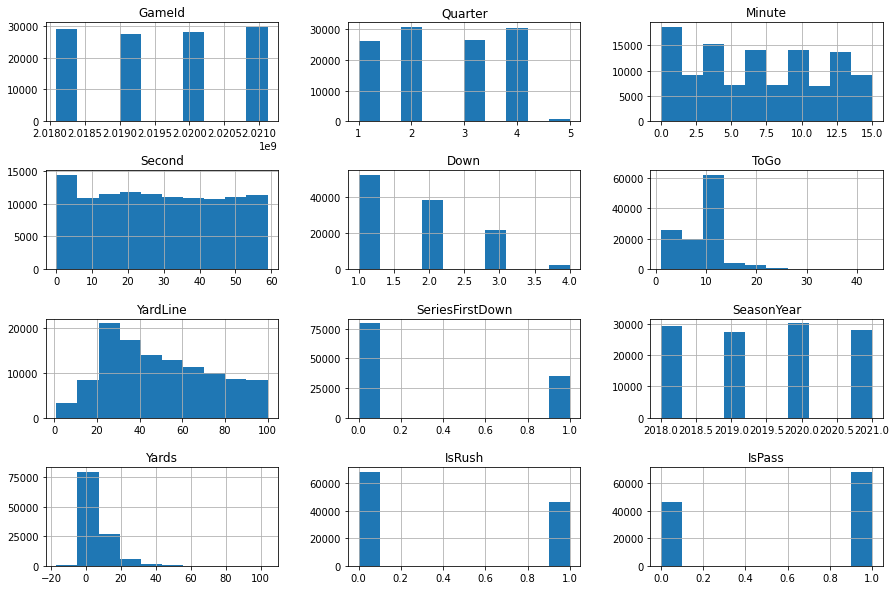

In [347]:
#Show data type histagram
final_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Text(0.5, 1.0, 'PlayType')

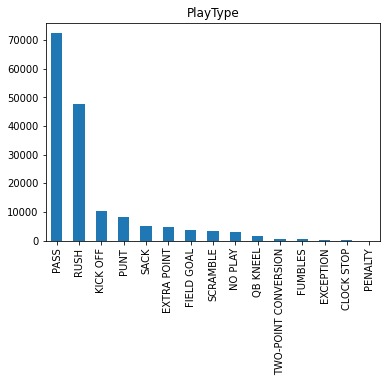

In [348]:
filtered_data['PlayType'].value_counts().plot(kind='bar')
plt.title('PlayType')

Text(0.5, 1.0, 'Formation')

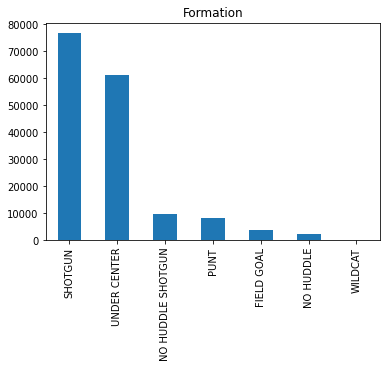

In [349]:
filtered_data['Formation'].value_counts().plot(kind='bar')
plt.title('Formation')

In [350]:
import math
math.ceil(5/10)

1

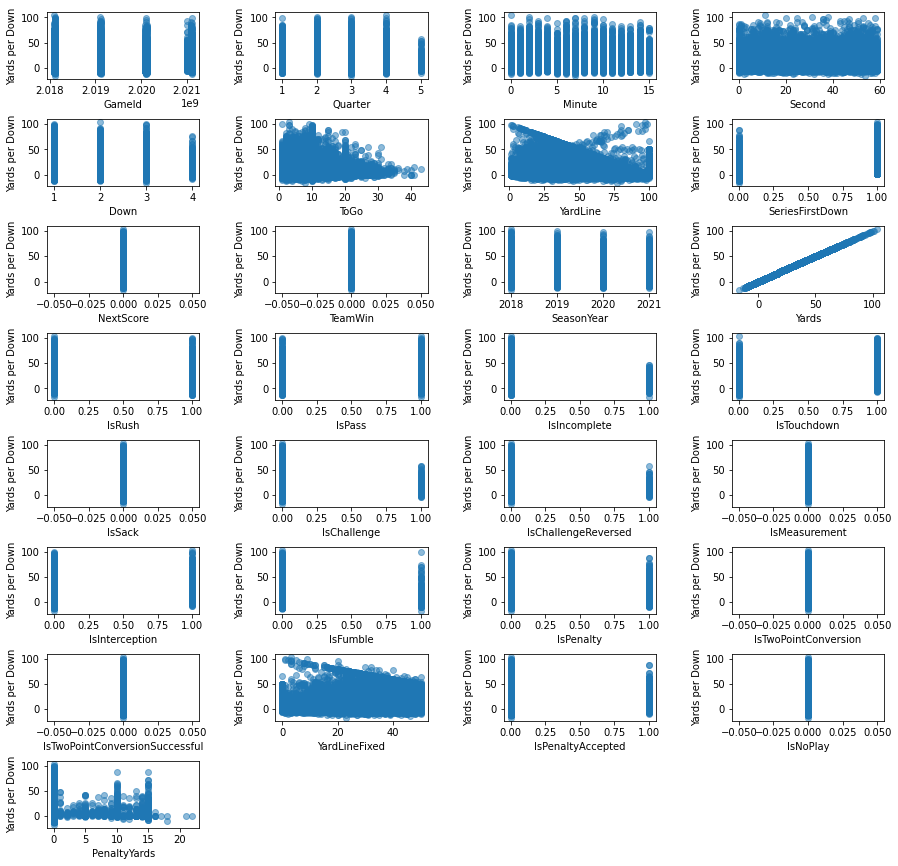

In [351]:
#Check which numeric variables are correlated with Yards in the dataset

#get all numeric variables from filtered_data_v3
filtered_data_v3_num = filtered_data_v3.select_dtypes(exclude='object')

# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Yards', data=filtered_data_v3, alpha=0.5)
        ax.set(xlabel=col, ylabel='Yards per Down')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
        
features = [col_x for col_x in filtered_data_v3_num.columns]


scatterplots(features, ncol=4, figsize=(15, 15))


## Strong correlations between Yards and numeric variables were not observed
## Try to explore relationship of Yards with categorical variables

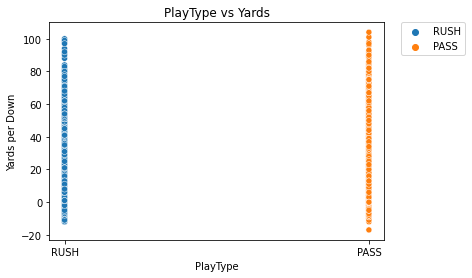

In [36]:
#Check Yards relationship with PlayType and Formations

sns.scatterplot(x="PlayType", y="Yards", data=filtered_data_v3, hue='PlayType')
plt.title("PlayType vs Yards")
plt.ylabel("Yards per Down")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();
    

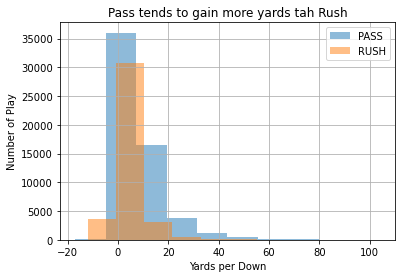

In [38]:
#PASS and RUSH does not make a significant difference in terms of Yards per down (Does not make sense)
#Check the Histogram between PASS and RUSH

Yards_for_pass = filtered_data_v3[filtered_data_v3.PlayType=='PASS'].Yards.hist(alpha=0.5, label='PASS')

Yards_for_rush = filtered_data_v3[filtered_data_v3.PlayType=='RUSH'].Yards.hist(alpha=0.5, label='RUSH')

plt.legend(loc='upper right')
plt.xlabel('Yards per Down')
plt.ylabel('Number of Play')
plt.title('Pass tends to gain more yards tah Rush')
plt.show()





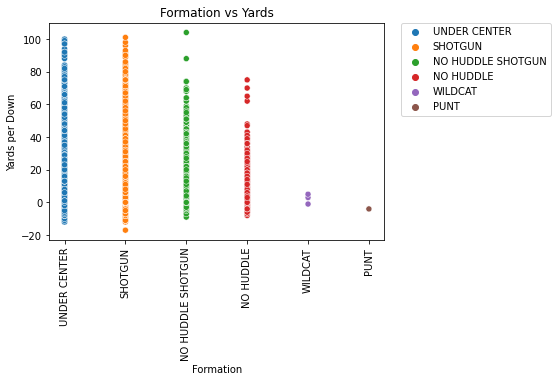

In [39]:
sns.scatterplot(x="Formation", y="Yards", data=filtered_data_v3, hue='Formation')
plt.title("Formation vs Yards")
plt.ylabel("Yards per Down")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

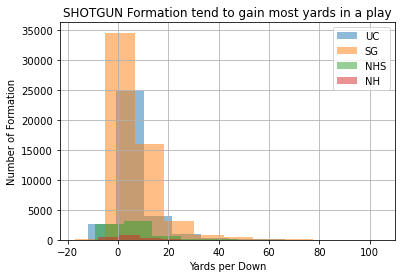

In [40]:
#check the histogram between four popular formations

Yards_for_UC = filtered_data_v3[filtered_data_v3.Formation=='UNDER CENTER'].Yards.hist(alpha=0.5, label='UC')

Yards_for_SG = filtered_data_v3[filtered_data_v3.Formation=='SHOTGUN'].Yards.hist(alpha=0.5, label='SG')

Yards_for_NHS = filtered_data_v3[filtered_data_v3.Formation=='NO HUDDLE SHOTGUN'].Yards.hist(alpha=0.5, label='NHS')

Yards_for_NH = filtered_data_v3[filtered_data_v3.Formation=='NO HUDDLE'].Yards.hist(alpha=0.5, label='NH')

plt.legend(loc='upper right')
plt.xlabel('Yards per Down')
plt.ylabel('Number of Formation')
plt.title('SHOTGUN Formation tend to gain most yards in a play')
plt.show()


## Convert categorical features for one hot vector and store the data for further analysis

In [18]:
#convert Formation, PlayType, OffenseTeam and DefenseTeam into one hot vector
PlayType_dummies = pd.get_dummies(filtered_data_v3.PlayType, prefix='PlayType')

Offense_dummies = pd.get_dummies(filtered_data_v3.OffenseTeam, prefix='Offense')
Defense_dummies = pd.get_dummies(filtered_data_v3.DefenseTeam, prefix='Defense')

Formation_dummies = pd.get_dummies(filtered_data_v3.Formation, prefix='Formation')

In [19]:
#combine dummies to obtain the final data

final_data = pd.concat([filtered_data_v3, PlayType_dummies, Offense_dummies, Defense_dummies, Formation_dummies], axis=1)


print(f"The Final Data shape is {final_data.shape}")

final_data.dtypes

The Final Data shape is (96713, 110)


GameId                          int64
GameDate                       object
Quarter                         int64
Minute                          int64
Second                          int64
                                ...  
Formation_NO HUDDLE SHOTGUN     uint8
Formation_PUNT                  uint8
Formation_SHOTGUN               uint8
Formation_UNDER CENTER          uint8
Formation_WILDCAT               uint8
Length: 110, dtype: object

### Pandas profiling to check on final data

In [21]:
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
%load_ext autoreload
%autoreload 2

In [22]:


#I am not seen the differences with explorative=True???
profile_report = filtered_data_v3.profile_report(explorative=True, html={'style': {'full_width': True}})
profile_report

#How to display the widget instead???
profile_report.to_widgets()

Summarize dataset:   0%|          | 0/53 [00:00<?, ?it/s]

/root/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/root/anaconda3/lib/python3.8/site-packages/pandas_profiling/model/correlations.py:101: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
'''
Remove features with constant values based on pd profiling results
'''
trimmed_final_data = final_data.drop(columns=['NextScore', 'TeamWin', 'IsSack', 'IsMeasurement', \
                                              'IsTwoPointConversion', 'IsTwoPointConversionSuccessful'])

### Performing feature engineering on the trimmed dataset
<b>Define a multiple regression problem, in which the response variable "success" is an engineered feature equal to the actual yard gained (Yards variable) divided by yard needed to achieve a first down or touchdown (yardToGo variable). Negative yards will result in a 0 success.<br>Independent features selected to include are OffenseTeam, DefenseTeam, Formation, PlayType, IsPass, IsRush, PassType, RushDirection, quarter, in which all pass related or rush related variables will be combined into new features. All Categorical features will be converted into one hot vectors</b>

<AxesSubplot:>

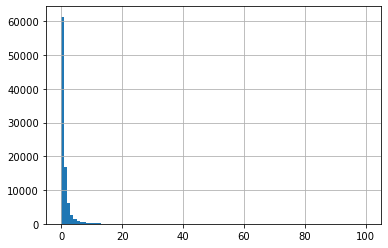

In [36]:
trimmed_final_data["success"] =trimmed_final_data.Yards / trimmed_final_data.ToGo

trimmed_final_data[trimmed_final_data.success<0] = 0

#most success are acutally 0

In [ ]:
#remove seriesFirstDown (it is just an indication of whether it is a first down or not)

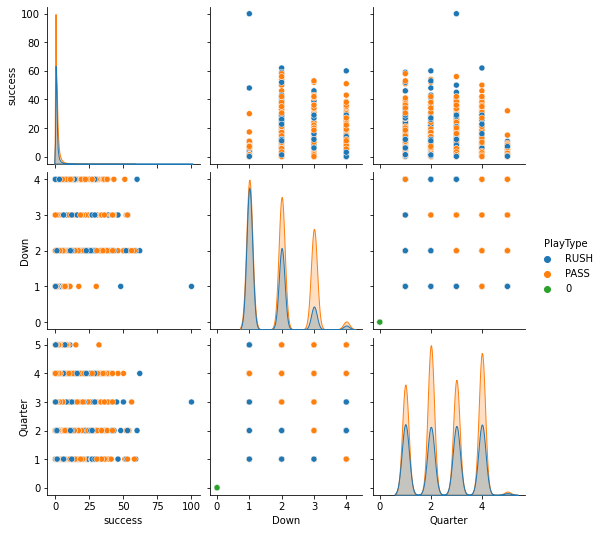

In [37]:
'''
sns pairplot to check some of the features

'''

trimmed_final_data = trimmed_final_data.reset_index()
sns.pairplot(trimmed_final_data[["success", "Down", "Quarter", "Formation", "RushDirection", "PassType", 'PlayType']], 
             hue='PlayType')

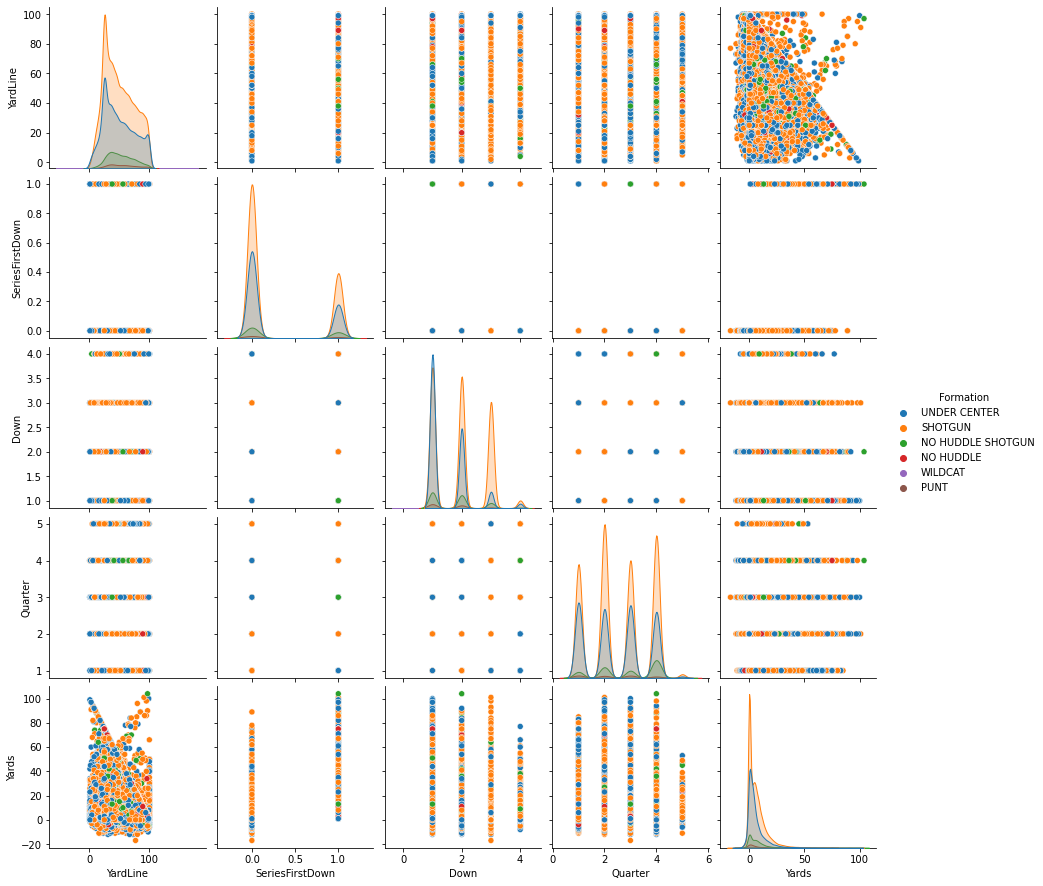

In [60]:
trimmed_final_data = trimmed_final_data.reset_index()
sns.pairplot(trimmed_final_data[["YardLine", "SeriesFirstDown", "Down", "Quarter", "Formation", "Yards", 'PlayType']], 
             hue='Formation')

In [38]:
trimmed_final_data.to_csv("preprocessed_nfl_data.csv")
print('Finished!')

Finished!
